## Defining the Goal
Challenge Question and Task:
**“What brain activity patterns are associated with ADHD; are they different between males and females, and, if so, how?”**

The task is to create a multi-outcome model to predict two separate target variables: 
1) ADHD (1=yes or 0=no) and 
2) female (1=yes or 0=no).


### Summary of what this notebook does (not in order)
1. Imports all the data into dataframes
2. Encodes the categorical features from `TRAIN_CATEGORICAL_METADATA.XLSX` appropriately
3. Label encodes the `ADHD_Outcome` feature from `TRAINING_SOLUTIONS.XLSX` (previously str)
4. Checks for nan values and imputes with most frequent feature value/discards the example as appropriate.
5. Normalizes the values from `TRAIN_QUANTITATIVE_METADATA.XLSX` such that they have mean 0 and standard deviation 1.
6. ADD
7. ADD
8. Merges the data into one single dataframe and saves it to a csv file called `merged_data.csv`

In [373]:
#Importing the required libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

### Importing and Examining Data

In [374]:
# Importing and preprocessing the dataset
cat_metadata = pd.read_excel('data/TRAIN/TRAIN_CATEGORICAL_METADATA.xlsx') # Categorical metadata
connectome_matrices = pd.read_csv('data/TRAIN/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv') #Connectome matrices
quant_metadata = pd.read_excel('data/TRAIN/TRAIN_QUANTITATIVE_METADATA.xlsx') # Quantitative metadata
sol = pd.read_excel('data/TRAIN/TRAINING_SOLUTIONS.xlsx') # Solutions to the training data examples

In [375]:
cat_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1202 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1213 non-null   int64  
 5   MRI_Track_Scan_Location           1213 non-null   int64  
 6   Barratt_Barratt_P1_Edu            1213 non-null   int64  
 7   Barratt_Barratt_P1_Occ            1213 non-null   int64  
 8   Barratt_Barratt_P2_Edu            1213 non-null   int64  
 9   Barratt_Barratt_P2_Occ            1213 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 94.9+ KB


In [376]:
cat_metadata.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45
1,CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0
2,Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0
3,p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0
4,M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0


In [377]:
connectome_matrices.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,70z8Q2xdTXM3,0.093473,0.146902,0.067893,0.015141,0.070221,0.063997,0.055382,-0.035335,0.068583,...,0.003404,-0.010359,-0.050968,-0.014365,0.128066,0.112646,-0.058980,0.028228,0.133582,0.143372
1,WHWymJu6zNZi,0.029580,0.179323,0.112933,0.038291,0.104899,0.064250,0.008488,0.077505,-0.004750,...,-0.008409,-0.008479,0.020891,0.017754,0.094040,0.035141,0.032537,0.075007,0.115350,0.138200
2,4PAQp1M6EyAo,-0.051580,0.139734,0.068295,0.046991,0.111085,0.026978,0.151377,0.021198,0.083721,...,0.053245,-0.028003,0.028773,0.024556,0.166343,0.058925,0.035485,0.063661,0.042862,0.162162
3,obEacy4Of68I,0.016273,0.204702,0.115980,0.043103,0.056431,0.057615,0.055773,0.075030,0.001033,...,-0.023918,-0.005356,0.018607,0.016193,0.072955,0.130135,0.056120,0.084784,0.114148,0.190584
4,s7WzzDcmDOhF,0.065771,0.098714,0.097604,0.112988,0.071139,0.085607,0.019392,-0.036403,-0.020375,...,0.066439,-0.076680,-0.047530,-0.031443,0.221213,0.007343,0.005763,0.083820,0.079582,0.067269


In [378]:
quant_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   participant_id              1213 non-null   object 
 1   EHQ_EHQ_Total               1213 non-null   float64
 2   ColorVision_CV_Score        1213 non-null   int64  
 3   APQ_P_APQ_P_CP              1213 non-null   int64  
 4   APQ_P_APQ_P_ID              1213 non-null   int64  
 5   APQ_P_APQ_P_INV             1213 non-null   int64  
 6   APQ_P_APQ_P_OPD             1213 non-null   int64  
 7   APQ_P_APQ_P_PM              1213 non-null   int64  
 8   APQ_P_APQ_P_PP              1213 non-null   int64  
 9   SDQ_SDQ_Conduct_Problems    1213 non-null   int64  
 10  SDQ_SDQ_Difficulties_Total  1213 non-null   int64  
 11  SDQ_SDQ_Emotional_Problems  1213 non-null   int64  
 12  SDQ_SDQ_Externalizing       1213 non-null   int64  
 13  SDQ_SDQ_Generating_Impact   1213 

In [379]:
sol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   participant_id  1213 non-null   object
 1   ADHD_Outcome    1213 non-null   int64 
 2   Sex_F           1213 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 28.6+ KB


### Processing NAN Data

All of the datasets have non null data for 1213 examples (in the training data). No further preprocessing required to impute missing values. Now we check if they have values that are outliers/nan.

In [380]:
# Counting how many nan values in each column of Categorical Metadata
print(f"NAN for Categorical Data:{cat_metadata.isna().sum()}")

NAN for Categorical Data:participant_id                       0
Basic_Demos_Enroll_Year              0
Basic_Demos_Study_Site               0
PreInt_Demos_Fam_Child_Ethnicity    11
PreInt_Demos_Fam_Child_Race          0
MRI_Track_Scan_Location              0
Barratt_Barratt_P1_Edu               0
Barratt_Barratt_P1_Occ               0
Barratt_Barratt_P2_Edu               0
Barratt_Barratt_P2_Occ               0
dtype: int64


**Design Decision:** Since the Categorical Data has 11 NAN values in one of the features, and there are a total of 1213 entries, we can replace these NAN values with the most common value in the dataset for this feature. 

In [381]:
# Replacing nan in the Categorical Data with the most common value in the dataset
col = 'PreInt_Demos_Fam_Child_Ethnicity'
cat_metadata[col] = cat_metadata[col].fillna(cat_metadata[col].mode()[0])
print(f"NAN for Categorical Data:{cat_metadata.isna().sum()}") # Values in all columns should be 0 now.

NAN for Categorical Data:participant_id                      0
Basic_Demos_Enroll_Year             0
Basic_Demos_Study_Site              0
PreInt_Demos_Fam_Child_Ethnicity    0
PreInt_Demos_Fam_Child_Race         0
MRI_Track_Scan_Location             0
Barratt_Barratt_P1_Edu              0
Barratt_Barratt_P1_Occ              0
Barratt_Barratt_P2_Edu              0
Barratt_Barratt_P2_Occ              0
dtype: int64


In [382]:
# Counting how many nan values in each column of Quantitative Metadata
print(f"NAN for Quantitative Data:{quant_metadata.isna().sum()}")

NAN for Quantitative Data:participant_id                  0
EHQ_EHQ_Total                   0
ColorVision_CV_Score            0
APQ_P_APQ_P_CP                  0
APQ_P_APQ_P_ID                  0
APQ_P_APQ_P_INV                 0
APQ_P_APQ_P_OPD                 0
APQ_P_APQ_P_PM                  0
APQ_P_APQ_P_PP                  0
SDQ_SDQ_Conduct_Problems        0
SDQ_SDQ_Difficulties_Total      0
SDQ_SDQ_Emotional_Problems      0
SDQ_SDQ_Externalizing           0
SDQ_SDQ_Generating_Impact       0
SDQ_SDQ_Hyperactivity           0
SDQ_SDQ_Internalizing           0
SDQ_SDQ_Peer_Problems           0
SDQ_SDQ_Prosocial               0
MRI_Track_Age_at_Scan         360
dtype: int64


**DESIGN DECISION:** Instead of imputing 360/1213 nan values (~30% of values), we just discard these values from the dataset because there's too many of them to impute.

In [383]:
column_to_check = 'MRI_Track_Age_at_Scan'
quant_metadata = quant_metadata.dropna(subset=column_to_check)
print(f"NAN for Quantitative Data:{quant_metadata.isna().sum()}") # Value for all columns should be 0

NAN for Quantitative Data:participant_id                0
EHQ_EHQ_Total                 0
ColorVision_CV_Score          0
APQ_P_APQ_P_CP                0
APQ_P_APQ_P_ID                0
APQ_P_APQ_P_INV               0
APQ_P_APQ_P_OPD               0
APQ_P_APQ_P_PM                0
APQ_P_APQ_P_PP                0
SDQ_SDQ_Conduct_Problems      0
SDQ_SDQ_Difficulties_Total    0
SDQ_SDQ_Emotional_Problems    0
SDQ_SDQ_Externalizing         0
SDQ_SDQ_Generating_Impact     0
SDQ_SDQ_Hyperactivity         0
SDQ_SDQ_Internalizing         0
SDQ_SDQ_Peer_Problems         0
SDQ_SDQ_Prosocial             0
MRI_Track_Age_at_Scan         0
dtype: int64


In [384]:
# Counting how many nan values in each column of MRI Data
print(f"NAN for MRI Data:{connectome_matrices.isna().sum().sum()}")
# Since there are no nan values, no need for further processing of this dataset.

NAN for MRI Data:0


## Normalizing Quantitative Data

Many of the quantitative data features come from scores of different types of scales. As such, it may be necessary to normalize them so that one scale does not overpower another by virtue of its definition.

In the output of the cell given below, notice how the means of each of the feature columns are vastly different, indicating that they have largely different magnitudes, and might overpower each other (i.e. features with larger absolute value might be learned as the model to be 'more important' than features with smaller absolute value). To mitigate this, we implement normalization of all these features. 

In [385]:
# Examining the range of the different columns of the quantitative data
quant_metadata.describe()

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
count,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000
mean,59.623036,13.128957,3.808910,13.301290,39.370457,17.746776,16.534584,25.199297,2.141852,12.140680,2.282532,7.611958,4.028136,5.470106,4.528722,2.246190,7.656506,11.245678
std,48.394417,2.844114,1.407497,3.810901,6.136833,3.710362,5.483461,3.913099,2.088375,6.758156,2.150147,4.251285,2.844838,2.857427,3.548548,2.104182,2.206573,3.234372
min,-100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.670000,14.000000,3.000000,11.000000,36.000000,16.000000,13.000000,23.000000,0.000000,7.000000,1.000000,4.000000,2.000000,4.000000,2.000000,0.000000,6.000000,8.803901
50%,74.470000,14.000000,3.000000,13.000000,40.000000,18.000000,16.000000,26.000000,2.000000,12.000000,2.000000,8.000000,4.000000,5.000000,4.000000,2.000000,8.000000,10.739219
75%,94.470000,14.000000,4.000000,16.000000,43.000000,20.000000,20.000000,28.000000,3.000000,17.000000,4.000000,11.000000,6.000000,8.000000,7.000000,4.000000,9.000000,13.460871
max,100.000000,14.000000,12.000000,28.000000,50.000000,27.000000,37.000000,30.000000,10.000000,32.000000,10.000000,20.000000,10.000000,10.000000,16.000000,9.000000,10.000000,21.564453


In [386]:
quant_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 853 entries, 2 to 1212
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   participant_id              853 non-null    object 
 1   EHQ_EHQ_Total               853 non-null    float64
 2   ColorVision_CV_Score        853 non-null    int64  
 3   APQ_P_APQ_P_CP              853 non-null    int64  
 4   APQ_P_APQ_P_ID              853 non-null    int64  
 5   APQ_P_APQ_P_INV             853 non-null    int64  
 6   APQ_P_APQ_P_OPD             853 non-null    int64  
 7   APQ_P_APQ_P_PM              853 non-null    int64  
 8   APQ_P_APQ_P_PP              853 non-null    int64  
 9   SDQ_SDQ_Conduct_Problems    853 non-null    int64  
 10  SDQ_SDQ_Difficulties_Total  853 non-null    int64  
 11  SDQ_SDQ_Emotional_Problems  853 non-null    int64  
 12  SDQ_SDQ_Externalizing       853 non-null    int64  
 13  SDQ_SDQ_Generating_Impact   853 non-nul

Feature scaling can be important (may miss the important datapoints if the values are small) -- COME BACK TO THIS LATER

In [387]:
# We normalize all columns in this dataset (except participant_id, which is a string) to have mean 0 and standard deviation 1
scaler = StandardScaler()
exclude = ['participant_id', 'MRI_Track_Age_at_Scan']
numeric_columns = quant_metadata.select_dtypes(include=['number']).columns.difference(exclude)
numeric_columns = numeric_columns.difference(['EHQ_EHQ_Total'])
quant_metadata[numeric_columns] = scaler.fit_transform(quant_metadata[numeric_columns])
quant_metadata.describe()       # All the means should be 0, standard deviations should be 1

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
count,853.000000,8.530000e+02,8.530000e+02,8.530000e+02,8.530000e+02,8.530000e+02,8.530000e+02,8.530000e+02,8.530000e+02,853.000000,8.530000e+02,8.530000e+02,8.530000e+02,8.530000e+02,8.530000e+02,8.530000e+02,8.530000e+02,853.000000
mean,59.623036,1.655573e-16,-1.457737e-16,6.663941e-17,5.164554e-16,-2.165781e-16,2.457328e-16,3.665168e-16,-8.329927e-17,0.000000,1.665985e-17,-9.995912e-17,-1.332788e-16,1.665985e-16,-9.995912e-17,4.997956e-17,6.663941e-17,11.245678
std,48.394417,1.000587e+00,1.000587e+00,1.000587e+00,1.000587e+00,1.000587e+00,1.000587e+00,1.000587e+00,1.000587e+00,1.000587,1.000587e+00,1.000587e+00,1.000587e+00,1.000587e+00,1.000587e+00,1.000587e+00,1.000587e+00,3.234372
min,-100.000000,-4.618893e+00,-2.707746e+00,-3.492374e+00,-6.419199e+00,-4.785837e+00,-3.017124e+00,-6.443506e+00,-1.026209e+00,-1.797503,-1.062193e+00,-1.791558e+00,-1.416776e+00,-1.915469e+00,-1.276967e+00,-1.068115e+00,-3.471899e+00,0.000000
25%,46.670000,3.064414e-01,-5.750523e-01,-6.042245e-01,-5.495399e-01,-4.710594e-01,-6.449681e-01,-5.623642e-01,-1.026209e+00,-0.761109,-5.968357e-01,-8.501140e-01,-7.133361e-01,-5.147875e-01,-7.130257e-01,-1.068115e+00,-7.511551e-01,8.803901
50%,74.470000,3.064414e-01,-5.750523e-01,-7.910631e-02,1.026445e-01,6.828780e-02,-9.754742e-02,2.047413e-01,-6.796457e-02,-0.020829,-1.314784e-01,9.133000e-02,-9.895993e-03,-1.646171e-01,-1.490842e-01,-1.170689e-01,1.557597e-01,10.739219
75%,94.470000,3.064414e-01,1.358457e-01,7.085709e-01,5.917828e-01,6.076350e-01,6.323468e-01,7.161450e-01,4.111576e-01,0.719452,7.992361e-01,7.974130e-01,6.935442e-01,8.858943e-01,6.968281e-01,8.339768e-01,6.092171e-01,13.460871
max,100.000000,3.064414e-01,5.823030e+00,3.859280e+00,1.733105e+00,2.495350e+00,3.734397e+00,1.227549e+00,3.765013e+00,2.940295,3.591380e+00,2.915662e+00,2.100424e+00,1.586235e+00,3.234565e+00,3.211591e+00,1.062674e+00,21.564453


## Encode Categorical Features/Feature Engineering

Read `Data Dictionary.xlsx`. It details the values/descriptions of the data in all the files. Note that all the variables in the Categorical Metadata file can be one hot encoded (or preprocessed in some way).

**Design Decision 1**: HOW DO WE ENCODE THESE?
1. One Hot Encoding
2. Label Encoding

Asmi's thoughts: One Hot Encoding might lead to sparse data because there are a lot of categories for some of the features. But label encoding might imply some sort of hierarchy among the feature values (that may not necessarily be the case).

ASK  TA - TODO

- Final Decision [ADD HERE]  - Try both and see what works?
- education levels - can go ahead with label encoding for these types (there is an inherent hierarchy)
- Figure out which features have orderly behavior - do these as label encodnig
- everything else do one hot encoding

UPDATE DOCUMENTATION

In [388]:
# Encoding the categorical variables
one_hot_encode_cols = ['Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 
                       'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location']

# Initialize OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform categorical columns
encoded_cat_data = encoder.fit_transform(cat_metadata[one_hot_encode_cols]).toarray()  # Convert to dense array

# Get feature names for encoded columns
encoded_cols = encoder.get_feature_names_out(one_hot_encode_cols)

# Create a DataFrame for the encoded data
cat_encoded = pd.DataFrame(encoded_cat_data, columns=encoded_cols, index=cat_metadata.index)

# Add the encoded columns back to the original DataFrame
cat_metadata = pd.concat([cat_metadata, cat_encoded], axis=1)

Notice that in Target Variables given in `TRAINING_SOLUTIONS.XLSX` the `ADHD_Outcome` field is a string. We need to convert this to a label encoded categorical int. This is done by the code in the cell below. 

### Feature Creation

Notice from the `DATA DICTIONARY.XLSX` file that the `EHQ_EHQ_Total` variable from `TRAIN_QUANTITATIVE_METADATA.XLSX` that represents the Latrality Index (Score) is a float, but the numbers correspond to 3 broad categories:
- -100 = 10th left (strongly left handed)
- -28 <= LI < 48 ------> middle (ambidextrous)
- 100 = 10th right (stronlly right handed)

**Design Decision 2:** DO WE ENCODE THIS DATA AS WELL?

In [389]:
# Add code to potentially encode/process EHQ_EHQ_Total Data
print(f"Number of unique values in this column: {quant_metadata['EHQ_EHQ_Total'].nunique()}")
quant_metadata['EHQ_EHQ_Total'].describe()


Number of unique values in this column: 132


count    853.000000
mean      59.623036
std       48.394417
min     -100.000000
25%       46.670000
50%       74.470000
75%       94.470000
max      100.000000
Name: EHQ_EHQ_Total, dtype: float64

In [390]:
# Counting how many values fall into each category
range_1 = (-float('inf'), -100)     #Right handed
range_2 = (-28, 48)                 #Ambidextrous
range_3 = (100, float('inf'))       #Left handed

count_range_1 = ((quant_metadata['EHQ_EHQ_Total'] >= range_1[0]) & (quant_metadata['EHQ_EHQ_Total'] <= range_1[1])).sum()
count_range_2 = ((quant_metadata['EHQ_EHQ_Total'] > range_2[0]) & (quant_metadata['EHQ_EHQ_Total'] <= range_2[1])).sum()
count_range_3 = ((quant_metadata['EHQ_EHQ_Total'] > range_3[0]) & (quant_metadata['EHQ_EHQ_Total'] <= range_3[1])).sum()

print(f"Count of values in range {range_1[0]} to {range_1[1]}: {count_range_1}")
print(f"Count of values in range {range_2[0]} to {range_2[1]}: {count_range_2}")
print(f"Count of values in range {range_3[0]} to {range_3[1]}: {count_range_3}")

Count of values in range -inf to -100: 9
Count of values in range -28 to 48: 163
Count of values in range 100 to inf: 0


Text(0, 0.5, 'Frequency')

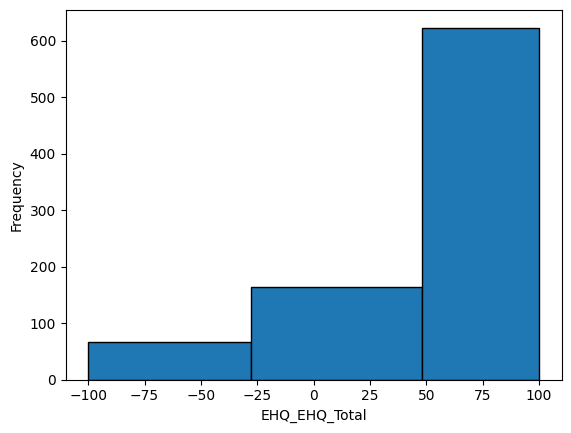

In [391]:
#Plotting a histogram of EHQ_EHQ_Total
bins = [-100, -28, 48, 100]
plt.hist(quant_metadata["EHQ_EHQ_Total"], bins=bins, edgecolor='black')
plt.xlabel("EHQ_EHQ_Total")
plt.ylabel("Frequency")

Notice that the distribution of handedness is not even (most of the people are right handed). This is reflective of the population (most people are, indeed, right handed), but it may result in the model being more accurate for right handed people since theres less data available for left handed and ambidexterous people.

TODO: Might want to consider dropping this feature

### Ideas for Dummy Variables
Quantitative Metadata
1. `MRI_Track,Age_at_Scan` - change this into categorical variables (e.g)

Text(0, 0.5, 'Frequency')

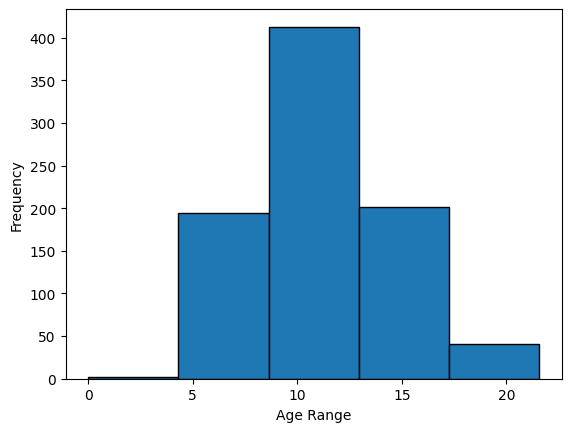

In [392]:
#Plotting a histogram of MRI_Track,Age_at_Scan
plt.hist(quant_metadata["MRI_Track_Age_at_Scan"], bins=5, edgecolor='black')
plt.xlabel("Age Range")
plt.ylabel("Frequency")

In [372]:
cat_metadata['Age_Range'] = pd.cut(quant_metadata['MRI_Track_Age_at_Scan'], bins=bins, labels=False, right=False)
quant_metadata.drop(columns='MRI_Track_Age_at_Scan')


,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial
2,Nb4EetVPm3gs,-46.67,14,4,10,35,16,10,29,1,14,2,8,5,7,6,4,9
4,M09PXs7arQ5E,0.00,14,5,15,40,20,24,28,1,18,4,11,4,10,7,3,9
6,DgRP31gu21O9,94.47,14,3,14,27,18,20,21,0,9,1,5,1,5,4,3,10
7,ClMA0FwvFgLY,60.00,14,3,15,41,21,19,25,3,16,3,11,6,8,5,2,6
8,NVUkahaJ6fhf,73.34,14,4,16,46,23,15,25,5,23,6,14,2,9,9,3,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1206,8RqLpySUwmWx,80.00,14,3,6,49,21,14,30,0,0,0,0,0,0,0,0,10
1208,Atx7oub96GXS,87.80,14,5,14,39,20,15,21,1,9,2,7,3,6,2,0,9
1209,groSbUfkQngM,77.80,14,3,10,32,20,11,23,6,18,3,11,9,5,7,4,7
1211,rOmWFuJCud5G,53.40,14,3,14,34,18,23,23,4,9,0,9,3,5,0,0,9


### Checking the Balance of the Dataset


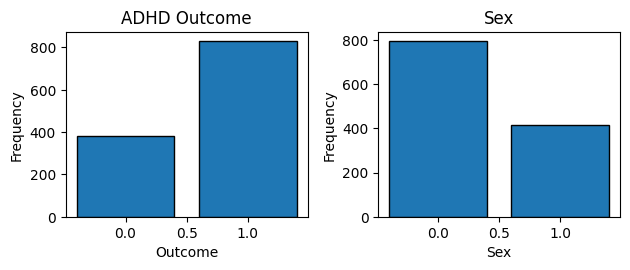

In [395]:
# Create a 2x2 grid for subplots
plt.subplot(2, 2, 1)
adhd_counts = sol['ADHD_Outcome'].value_counts()
plt.bar(adhd_counts.index, adhd_counts.values, edgecolor='black')
plt.title("ADHD Outcome")
plt.xlabel("Outcome")
plt.ylabel("Frequency")

# Second subplot
plt.subplot(2, 2, 2)
sex_counts = sol['Sex_F'].value_counts()
plt.bar(sex_counts.index, sex_counts.values, edgecolor='black')
plt.title("Sex")
plt.xlabel("Sex")
plt.ylabel("Frequency")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

Based on the plots above, we see that the dataset is unbalanced with almost twice as much available data for positive ADHD diagnoses and for male participants. This can be mitigated by using appropriate sampling methods at the time of training to 

ToDO:
- SMOTE - upsampling data (create more relevant data based on existing dataset) - check WiDS videos
- Base model - decision tree

## Combining the datasets into one giant training dataset

In [398]:
merge_column = 'participant_id'

#Note that we have how set to inner so that we discard the rows where the participant ids dont match 
#(because we discarded some rows with nan results earlier)
#merged_df = cat_metadata.merge(connectome_matrices, on=merge_column, how='inner')
merged_df = cat_metadata.merge(quant_metadata, on=merge_column, how='inner')
merged_df = merged_df.merge(sol, on=merge_column, how='inner')
merged_df.columns


Index(['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ', 'Basic_Demos_Study_Site_1',
       'Basic_Demos_Study_Site_2', 'Basic_Demos_Study_Site_3',
       'Basic_Demos_Study_Site_4', 'PreInt_Demos_Fam_Child_Ethnicity_0.0',
       'PreInt_Demos_Fam_Child_Ethnicity_1.0',
       'PreInt_Demos_Fam_Child_Ethnicity_2.0',
       'PreInt_Demos_Fam_Child_Ethnicity_3.0', 'PreInt_Demos_Fam_Child_Race_0',
       'PreInt_Demos_Fam_Child_Race_1', 'PreInt_Demos_Fam_Child_Race_2',
       'PreInt_Demos_Fam_Child_Race_3', 'PreInt_Demos_Fam_Child_Race_4',
       'PreInt_Demos_Fam_Child_Race_7', 'PreInt_Demos_Fam_Child_Race_8',
       'PreInt_Demos_Fam_Child_Race_9', 'PreInt_Demos_Fam_Child_Race_10',
       'PreInt_Demos_Fam_Child_Race_11', 'MRI_Track_Scan_Locati

In [399]:
merged_df.shape

(853, 53)

In [22]:
# Saving the merged data
merged_df.to_csv('merged_data.csv', index=False)